In [ ]:
#https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2021/03-classification/homework.ipynb

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


usecols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']

df_original = os.listdir()[1]
df_original = pd.read_csv(df_original, usecols=usecols)
df = df_original.copy()
#df = shuffle(df, random_state=42)
df = df.fillna(0)
df.reset_index(inplace=True) 



--2022-09-24 17:02:09--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  --.-KB/s    in 0.02s   

2022-09-24 17:02:09 (84.7 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]



In [2]:
df

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
'''
-Select only the features from above and fill in the missing values with 0.


-Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = df['total_rooms']/ df['households']

-Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = df['total_bedrooms']/ df['total_rooms']

-Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = df['population']/ df['households']



'''

"\n-Select only the features from above and fill in the missing values with 0.\n\n\n-Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.\ndf['rooms_per_household'] = df['total_rooms']/ df['households']\n\n-Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.\ndf['bedrooms_per_room'] = df['total_bedrooms']/ df['total_rooms']\n\n-Create a new column population_per_household by dividing the column population by the column households from dataframe.\ndf['population_per_household'] = df['population']/ df['households']\n\n\n\n"

In [8]:
# ALL the preprocessing
#df = df.copy()

#Data preparation
df['rooms_per_household'] = df['total_rooms']/ df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/ df['total_rooms']
df['population_per_household'] = df['population']/ df['households']

#median_house_value
mean = df['median_house_value'].mean()
df['above_average'] = np.where(df['median_house_value'] >= mean, 1,0)

onehotencoder = OneHotEncoder()

X = onehotencoder.fit_transform(df.ocean_proximity.values.reshape(-1,1)).toarray()
#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns = ["proximity"+str(int(i)) for i in range(len(df.ocean_proximity.unique()))])
df = pd.concat([df, dfOneHot], axis=1)









# train test split
from sklearn.metrics import mutual_info_score
#mutual_information_df = mutual_information_df.drop('median_house_value', axis=1)

x_train, x_test, y_train, y_test = train_test_split(df.loc[:, ~df.columns.isin(['median_house_value', 'ocean_proximity', "above_average"])], 
                                                          df.above_average.values, 
                                                          test_size= .20,
                                                          random_state=42)
                                                          
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)


In [ ]:
#             Q1              What is the most frequent observation (mode) for the column ocean_proximity?

In [ ]:
########################################               QUESTION 2              ########################################

In [ ]:
'''
Question 2
Create the correlation matrix for the numerical features of your train dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
What are the two features that have the biggest correlation in this dataset?


'''

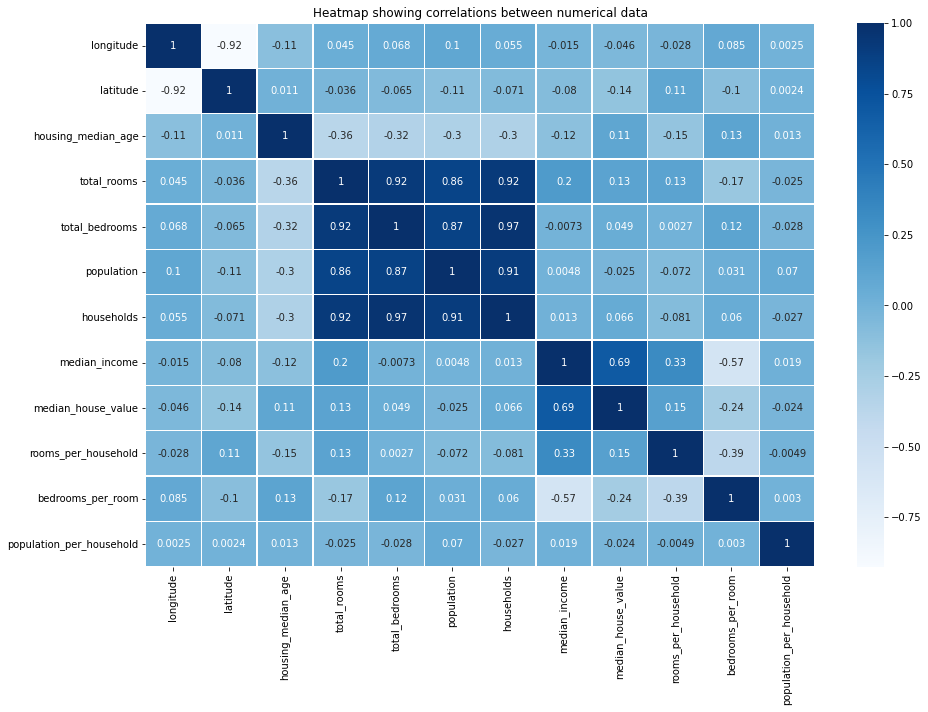

In [ ]:
plt.figure(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()


In [ ]:

df.corr().unstack().sort_values(ascending = False).drop_duplicates()


longitude            longitude            1.000000
total_bedrooms       households           0.966507
total_rooms          total_bedrooms       0.920196
                     households           0.918484
population           households           0.907222
                                            ...   
housing_median_age   total_bedrooms      -0.317063
                     total_rooms         -0.361262
rooms_per_household  bedrooms_per_room   -0.387465
bedrooms_per_room    median_income       -0.573836
longitude            latitude            -0.924664
Length: 67, dtype: float64

In [ ]:
########################################               QUESTION 3              ########################################

In [6]:
mutual_information_df = df.copy()
mean = mutual_information_df['median_house_value'].mean()
#np.where(median_df['median_house_value'] >= mean, 1,0)
mutual_information_df['above_average'] = np.where(mutual_information_df['median_house_value'] >= mean, 1,0)


from sklearn.metrics import mutual_info_score
#mutual_information_df = mutual_information_df.drop('median_house_value', axis=1)


df_mi = mutual_info_score(df_train.above_average, df_train.ocean_proximity)
round(df_mi, 2)


0.1

In [ ]:
########################################               QUESTION 4              ########################################

In [ ]:
'''

Question 4
Now let's train a logistic regression
Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.




'''

In [9]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
accuracy = np.round(accuracy_score(y_val, y_pred),2)
accuracy

0.84

In [ ]:
#                   Q5


'total_rooms',
'total_bedrooms',
'population',
'households',

In [31]:
features = ['total_rooms','total_bedrooms','population','households',]
features_ = features.copy()



In [32]:
orig_score = accuracy


for c in features:
    orig_s = []
    score_ = []
    used = []
    used.append(c)

    subset = features.copy()
    subset.remove(c)
    
    train_dict = x_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42,max_iter=1000)
    model.fit(X_train, y_train)

    val_dict = x_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    score_.append(score)

    print(c, orig_score - score, score)

total_rooms 0.21209302325581392 0.627906976744186
total_bedrooms 0.17914728682170544 0.6608527131782945
population 0.18399224806201542 0.6560077519379846
households 0.16848837209302325 0.6715116279069767


In [30]:
print(used)

['proximity4']


In [ ]:
#                  Q6

In [33]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = x_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = x_val.to_dict(orient='records')
X_val = dv.transform(val_dict)



In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [36]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.453
0.01 0.453
0.1 0.453
1 0.453
10 0.453
